# House Price Prediction using Linear Regression
## 1.   This model predicts the house prices using linear regression model.
## 2.   The dataset is of zameen.com, one of Pakistan's prime online real estate platform.
## 3.   The dataset is very large consisting of 191,393 records for five cities as: 
### - Karachi
### - Lahore
### - Rawalpindi
### - Islamabad
### - Faisalabad.
## 4.   We are using the data from Karachi to apply the price prediction model for 'Karachi'.
## 5.   Moreover, There are many property types such as plot, house, flat, penthouse etc. 
## 6.   For building an efficient model we have used property type as 'House'.

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
%matplotlib inline

In [3]:
#reading dataset
df =  pd.read_csv('property_House_Zammeen_com.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     191393 non-null  int64  
 1   property_id    191393 non-null  int64  
 2   location_id    191393 non-null  int64  
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   location       191393 non-null  object 
 6   city           191393 non-null  object 
 7   province_name  191393 non-null  object 
 8   latitude       191393 non-null  float64
 9   longitude      191393 non-null  float64
 10  baths          191393 non-null  int64  
 11  area           191393 non-null  object 
 12  purpose        191393 non-null  object 
 13  bedrooms       191393 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 20.4+ MB


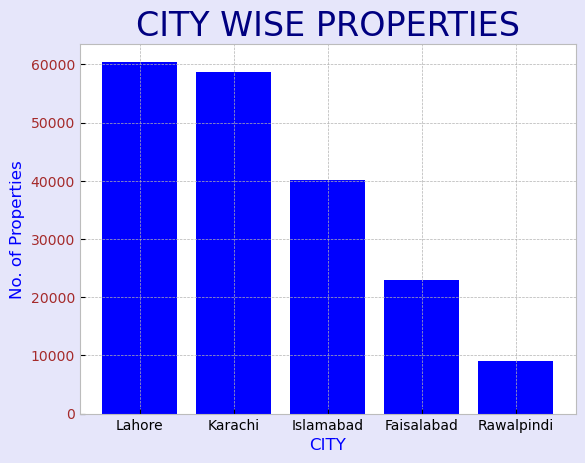

In [4]:
#plotting a bar chart for citywise distribution
cities = df['city'].unique()
city_counts = df['city'].value_counts()

# Plot
plt.bar(cities, city_counts, color='blue')

# Add labels and title with color
plt.xlabel('CITY', color='blue')
plt.ylabel('No. of Properties', color='blue')
plt.title('CITY WISE PROPERTIES', fontsize=24, color='navy')

# Customize tick label colors
plt.xticks(color='black', fontsize=10)  # X-axis tick label colors
plt.yticks(color='brown', fontsize=10)   # Y-axis tick label colors

# Set plot background color
plt.gca().set_facecolor('white')  # Light yellow background for the plot

# Set figure background color (optional)
plt.gcf().set_facecolor('lavender')  # Light gray background for the entire figure

# Show plot
plt.show()

In [5]:
#filtering the data for city as 'Karachi' and property type as 'House' and Purpose is 'For sale'
df = df[(df['city'] == 'Karachi') & (df['purpose'] == 'For Sale') & (df['property_type'] == 'House')]
df = df.drop(['property_id','Unnamed: 0','property_type','city','province_name','latitude','longitude','purpose'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 217 to 179280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  21600 non-null  int64 
 1   price        21600 non-null  int64 
 2   location     21600 non-null  object
 3   baths        21600 non-null  int64 
 4   area         21600 non-null  object
 5   bedrooms     21600 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


In [6]:
len(df['location'].unique())

157

In [7]:
# Deleting rows where location data has insufficient records, so as to improve model prection performance
df = df[df['location'].isin(df['location'].value_counts()[df['location'].value_counts() >= 25].index)]
#df.to_csv('locations.csv')
df.shape

(20864, 6)

In [8]:
len(df['location'].value_counts())

36

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20864 entries, 217 to 179280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  20864 non-null  int64 
 1   price        20864 non-null  int64 
 2   location     20864 non-null  object
 3   baths        20864 non-null  int64 
 4   area         20864 non-null  object
 5   bedrooms     20864 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [10]:
#converting location column to from categorical to numerical
locations = df['location'].unique()
locations_dict = {locations[i]: i  for i in range(len(locations))}

df.loc[:, 'location'] = df['location'].replace(locations_dict)
df.location.unique()
df['location']=df['location'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20864 entries, 217 to 179280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  20864 non-null  int64 
 1   price        20864 non-null  int64 
 2   location     20864 non-null  int64 
 3   baths        20864 non-null  int64 
 4   area         20864 non-null  object
 5   bedrooms     20864 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


/var/folders/46/_xpnnb_d5wb7fkzmpztdbqwh0000gn/T/ipykernel_1004/3208946132.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'location'] = df['location'].replace(locations_dict)


In [11]:
#calculating the area in square feet, and convert it from string to numerical
df = df.copy()
df['area_num'] = df['area'].str.split(' ').str[0]
df['area_str'] = df['area'].str.split(' ').str[1]
df.head()

,location_id,price,location,baths,area,bedrooms,area_num,area_str
217,6649,450000000,0,7,4 Kanal,6,4,Kanal
218,232,35000000,1,8,16 Marla,6,16,Marla
220,9594,6500000,2,1,3.2 Marla,2,3.2,Marla
221,6732,13000000,3,4,9.6 Marla,4,9.6,Marla
222,1674,32000000,4,4,4 Marla,4,4,Marla


In [12]:
df.area_str.unique()

array(['Kanal', 'Marla'], dtype=object)

In [13]:
df['area_num'] = df['area_num'].str.replace(',', '')
df['area_num'].unique()

array(['4', '16', '3.2', '9.6', '1', '4.8', '13.4', '14', '1.2', '9.7',
       '3', '1.1', '8', '10.6', '18', '11.2', '1.5', '11', '2', '17.5',
       '3.4', '3.3', '2.8', '1.6', '5', '6', '1.3', '7', '2.2', '2.7',
       '12', '6.7', '4.4', '10.9', '6.1', '10', '15.3', '3.6', '5.1',
       '6.4', '8.4', '5.6', '4.6', '10.8', '12.6', '9.3', '1.8', '2.4',
       '3.7', '8.6', '10.2', '8.1', '10.4', '5.4', '12.8', '3.8', '2.6',
       '13.1', '9', '8.5', '6.2', '5.2', '18.1', '8.2', '2.5', '17',
       '17.2', '8.8', '7.2', '14.2', '13.3', '9.4', '4.7', '12.4', '13.7',
       '5.7', '5.3', '6.6', '1.7', '10.7', '11.5', '13.6', '3.5', '14.8',
       '7.1', '14.4', '19.2', '1.4', '5.8', '8.3', '15.4', '18.4', '18.2',
       '18.7', '4.2', '4.9', '4.3', '15.6', '7.7', '17.1', '17.8', '1.9',
       '2.1', '15.2', '19', '10.1', '9.5', '16.9', '6.9', '19.1', '13.2',
       '7.5', '6.3', '18.3', '5.9', '18.8', '12.2', '6.8', '3.9', '17.3',
       '7.8', '7.6', '9.2', '5.5', '18.6', '4.5', '17.6

In [14]:
df = df.copy()

df['area_str'] = df['area_str'].replace({
    'Kanal': '4500',
    'Marla': '225'
}).astype(int)

df['area_num'] = df['area_num'].astype(float)

df.area = (df.area_num*df.area_str)
#df.area = df.area.astype(float)
df['pricepersqft'] = df['price'] / df['area']
df = df.drop(['area_num','area_str'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20864 entries, 217 to 179280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location_id   20864 non-null  int64  
 1   price         20864 non-null  int64  
 2   location      20864 non-null  int64  
 3   baths         20864 non-null  int64  
 4   area          20864 non-null  float64
 5   bedrooms      20864 non-null  int64  
 6   pricepersqft  20864 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.3 MB


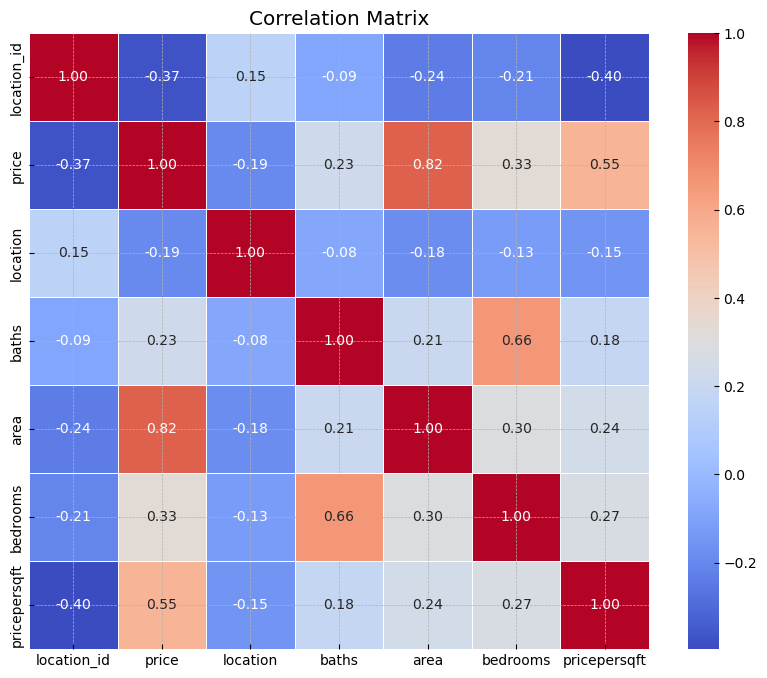

In [15]:
#plotting heatmap for the variables
correlation_matrix = df.corr()
#print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
#Defining function for Removing Outliers from any column or list of columns
def remove_outliers(some_df, mylist):
    for item in mylist:
        
        # Calculate Q1, Q3, and IQR
        Q1 = some_df[item].quantile(0.25)
        Q3 = some_df[item].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        # Detect outliers
        outliers = some_df[(some_df[item] < lower_bound) | (some_df[item] > upper_bound)]
        #print("Outliers:")
        #print(outliers)
        
        # Remove outliers
        cleaned_data = some_df[(some_df[item] >= lower_bound) & (some_df[item] <= upper_bound)]
        
        #print("Data without outliers:")
        #print(df_cleaned)
    
        #Visualize cleaned data
        sns.boxplot(x=cleaned_data[item], color='lightgreen')
        plt.title("Box Plot Without Outliers")
        plt.show()

    return cleaned_data

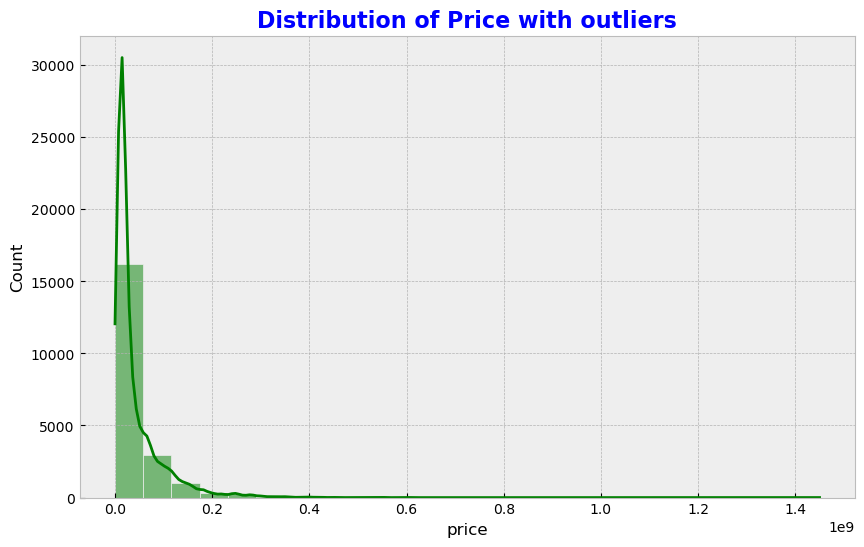

In [17]:
#hitogram for price distribution with outliers
fig, plt1 = plt.subplots(figsize = (10,6), nrows=1, ncols=1)

sns.histplot(data=df, x='price', bins=25, kde=True, color='green')
plt.title(f'Distribution of Price with outliers', fontsize=16, fontweight='bold', color='blue')
plt.show()

(20864, 7)
Lower Bound: -43750000.0, Upper Bound: 106250000.0


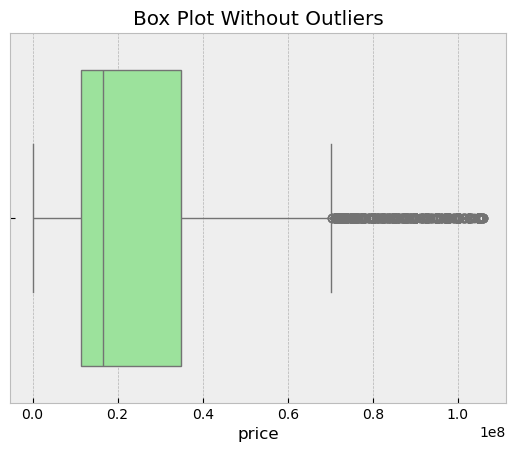

Lower Bound: -2025.0, Upper Bound: 6255.0


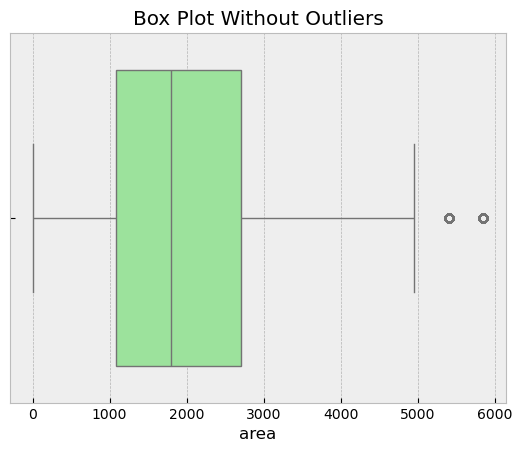

Lower Bound: -2.5, Upper Bound: 9.5


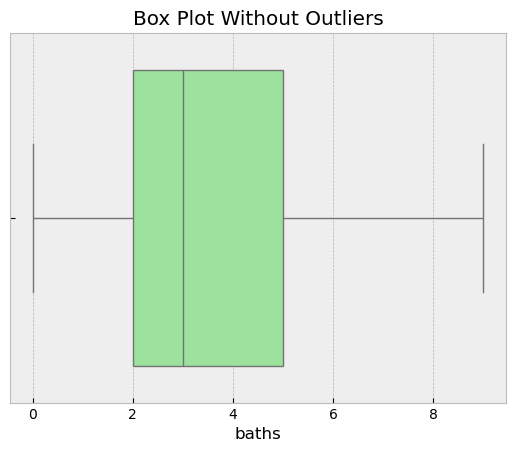

Lower Bound: -1.5, Upper Bound: 10.5


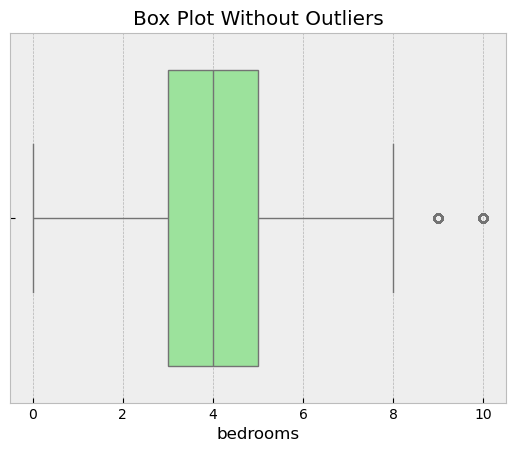

Lower Bound: -6344.387755102036, Upper Bound: 32796.20181405895


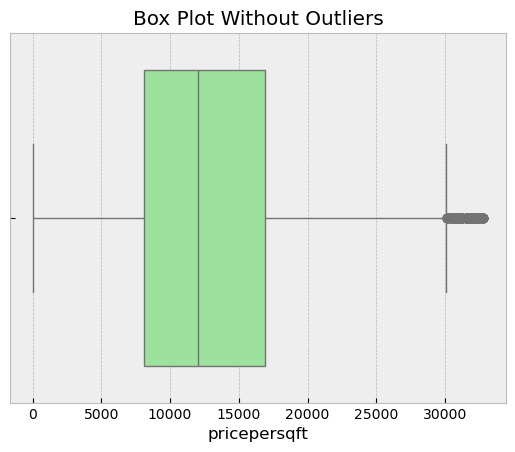

(19857, 7)


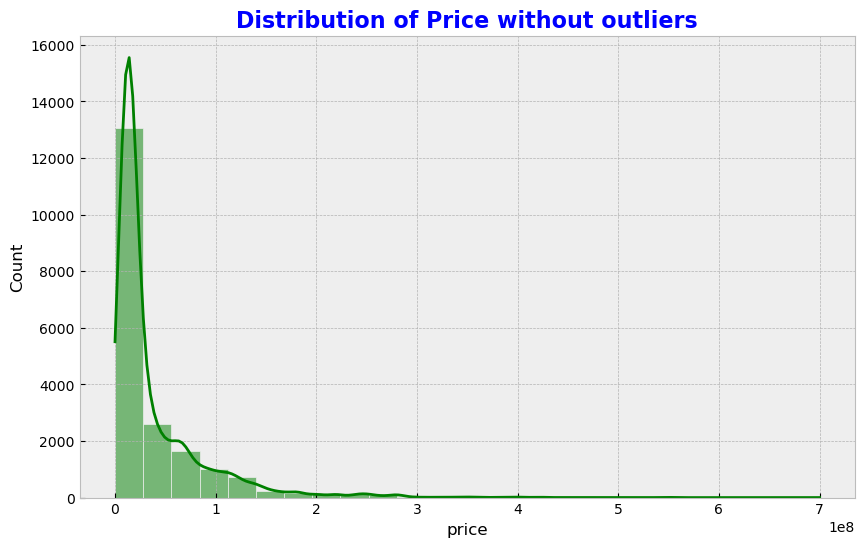

In [18]:
#Removing Outliers
print(df.shape)
df1 = df.copy()
df = remove_outliers(df, ['price', 'area', 'baths', 'bedrooms', 'pricepersqft'])  
#df = remove_outliers(df, ['area'])
#df = remove_outliers(df, ['baths'])
#df = df.drop('baths', axis=1)
print(df.shape)
fig, plt1 = plt.subplots(figsize = (10,6), nrows=1, ncols=1)


sns.histplot(data=df, x='price', bins=25, kde=True, color='green')
plt.title(f'Distribution of Price without outliers', fontsize=16, fontweight='bold', color='blue')
plt.show()

In [19]:
df.head()


,location_id,price,location,baths,area,bedrooms,pricepersqft
217,6649,450000000,0,7,18000.0,6,25000.000000
218,232,35000000,1,8,3600.0,6,9722.222222
220,9594,6500000,2,1,720.0,2,9027.777778
221,6732,13000000,3,4,2160.0,4,6018.518519
223,7132,4000000,2,3,720.0,7,5555.555556


----------------------------------------
Model Evaluation for Price Prediction
----------------------------------------
Total Properties: 19857
Coefficients: [[-0.01652282 -0.00769457  0.00259064  1.60299443 -0.01103431  0.17510953]]
Intercept: [-0.04064425]
Mean Squared Error: 0.0002
R^2 Score: 0.9382


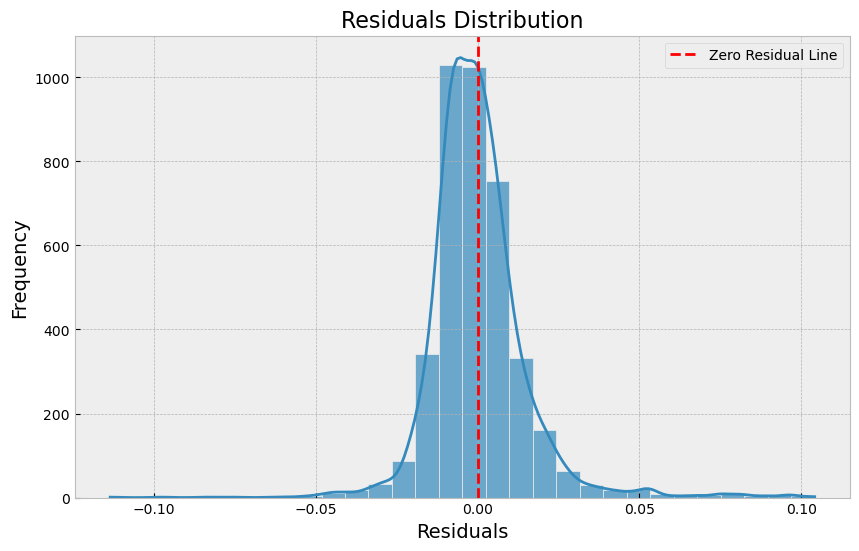

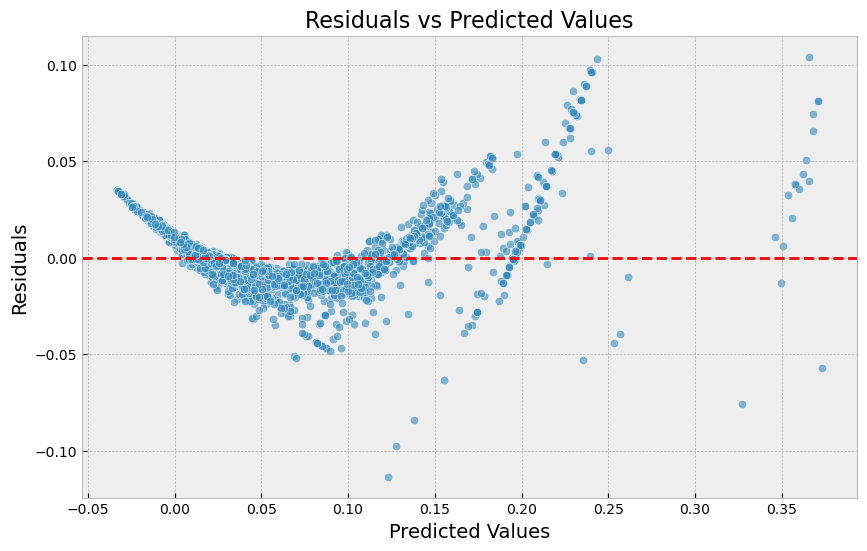

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assume df is your DataFrame and 'price' is the target column
# Replace 'df' with your actual DataFrame variable if different.

# Independent and dependent variables
X = df.drop('price', axis=1)
y = df['price']

# Remove rows containing NaN or infinity, if any
X = X.dropna()  # Drop rows with NaN
X = X[~np.isinf(X).any(axis=1)]  # Drop rows with infinity
y = y.loc[X.index]  # Ensure target matches the cleaned feature set

# Feature scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Apply log transformation to stabilize variance
X_transformed = np.log(X_scaled - X_scaled.min() + 1)

# Scaling and transforming the target variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
y_transformed = np.log(y_scaled - y_scaled.min() + 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=29)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print('-' * 40)
print(f'Model Evaluation for Price Prediction')
print('-' * 40)
print(f'Total Properties: {df.shape[0]}')
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Residuals
residuals = y_test - y_pred

# Residuals distribution graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Flatten y_pred and residuals to 1-dimensional arrays
y_pred_flat = y_pred.flatten()
residuals_flat = residuals.flatten()

# Residuals vs Predictions scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_flat, y=residuals_flat, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()




----------------------------------------
Model Evaluation with Box-Cox Transformation
----------------------------------------
Total Properties: 19857
Coefficients: [ 0.8336018  -0.97930182  0.38817288 43.59384502  0.59289328 10.2821727 ]
Intercept: 21.1038780435496
Mean Squared Error: 0.4124
R^2 Score: 0.9207
Box-Cox Lambda: 0.0475


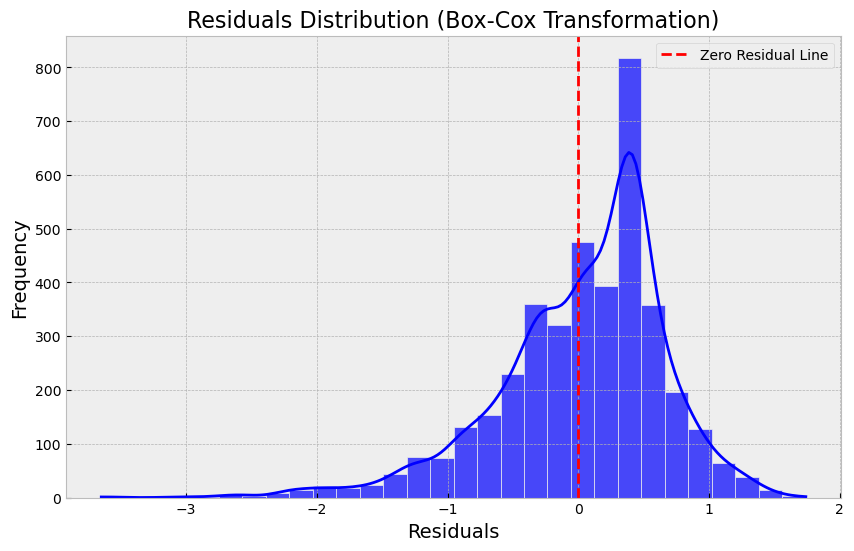

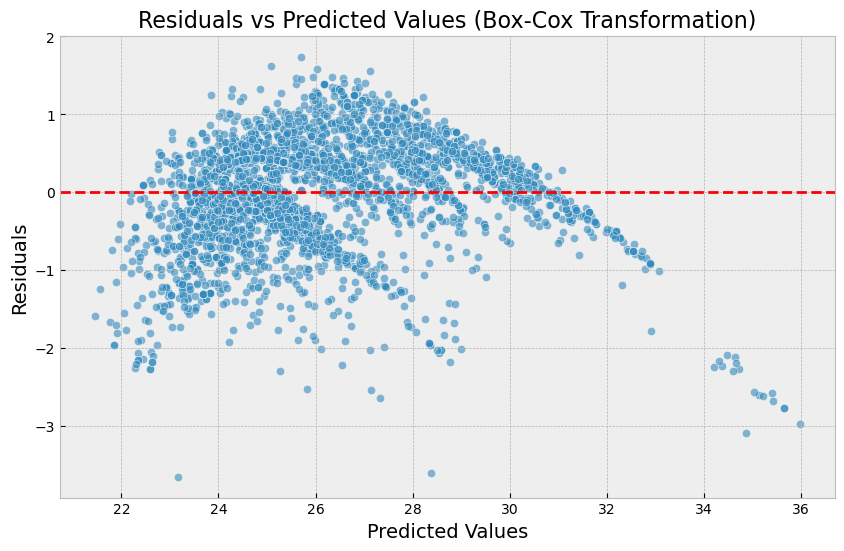

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

# Assume df is your DataFrame and 'price' is the target column
# Replace 'df' with your actual DataFrame variable if different.

# Independent and dependent variables
X = df.drop('price', axis=1)
y = df['price']

# Remove rows containing NaN or infinity, if any
X = X.dropna()  # Drop rows with NaN
X = X[~np.isinf(X).any(axis=1)]  # Drop rows with infinity
y = y.loc[X.index]  # Ensure target matches the cleaned feature set

# Feature scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Apply log transformation to X to stabilize variance
X_transformed = np.log(X_scaled - X_scaled.min() + 1)

# Box-Cox transformation for y
# Adding a small constant to ensure all values are positive
y_shifted = y + 1  # Shift data to make all values > 0
y_transformed, lambda_val = boxcox(y_shifted)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=29)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print('-' * 40)
print(f'Model Evaluation with Box-Cox Transformation')
print('-' * 40)
print(f'Total Properties: {df.shape[0]}')
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Box-Cox Lambda: {lambda_val:.4f}")

# Residuals
residuals = y_test - y_pred

# Residuals distribution graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals Distribution (Box-Cox Transformation)', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Residuals vs Predictions scatter plot
y_pred_flat = y_pred.flatten()
residuals_flat = residuals.flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_flat, y=residuals_flat, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Box-Cox Transformation)', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


----------------------------------------
Model Evaluation with Weighted Least Squares (WLS)
----------------------------------------
Total Properties: 19857
Coefficients: location_id       -619.366903
location       -123166.829103
baths           117152.362822
area             14608.797075
bedrooms       -360277.440737
pricepersqft      3011.439634
dtype: float64
Intercept: -31462448.769525163
Mean Squared Error: 173548449718832.4062
R^2 Score: 0.9255


/var/folders/46/_xpnnb_d5wb7fkzmpztdbqwh0000gn/T/ipykernel_1004/4286791087.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", wls_model.params[0])


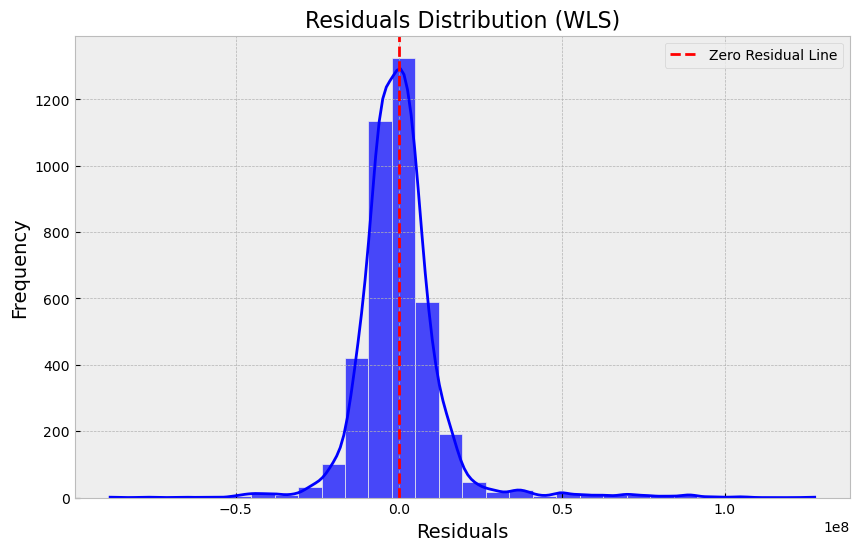

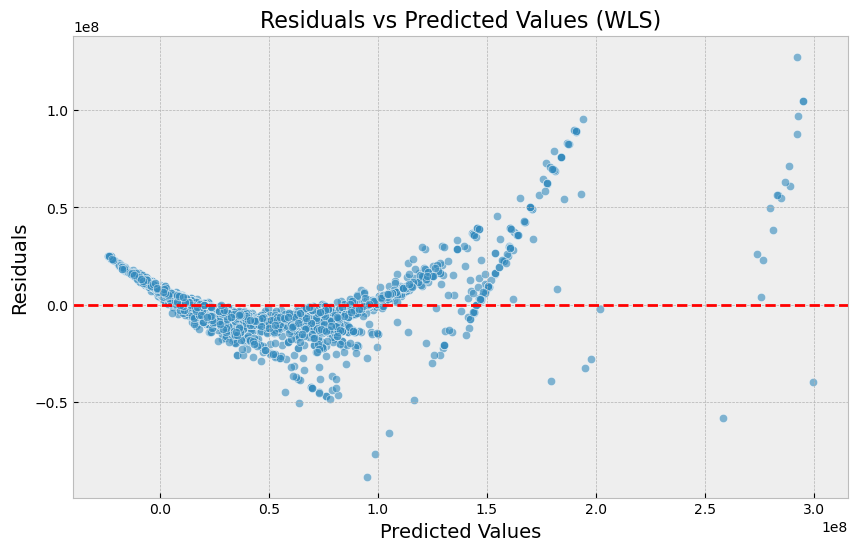

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Assume df is your DataFrame and 'price' is the target column
# Replace 'df' with your actual DataFrame variable if different.

# Independent and dependent variables
X = df.drop('price', axis=1)
y = df['price']

# Remove rows containing NaN or infinity, if any
X = X.dropna()  # Drop rows with NaN
X = X[~np.isinf(X).any(axis=1)]  # Drop rows with infinity
y = y.loc[X.index]  # Ensure target matches the cleaned feature set

# Feature scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Apply log transformation to X to stabilize variance
#X_transformed = np.log(X_scaled - X_scaled.min() + 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Add constant to the features (required for statsmodels)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit an initial OLS model to get residuals
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Calculate weights (inverse of residual variance)
residuals = ols_model.resid
weights = 1 / (residuals**2 + 1e-6)  # Add small constant to avoid division by zero

# Fit the WLS model
wls_model = sm.WLS(y_train, X_train_sm, weights=weights).fit()

# Make predictions
y_pred = wls_model.predict(X_test_sm)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print('-' * 40)
print(f'Model Evaluation with Weighted Least Squares (WLS)')
print('-' * 40)
print(f'Total Properties: {df.shape[0]}')
print("Coefficients:", wls_model.params[1:])
print("Intercept:", wls_model.params[0])
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Residuals for WLS
residuals_wls = y_test - y_pred

# Residuals distribution graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals_wls, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals Distribution (WLS)', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Residuals vs Predictions scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals_wls, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (WLS)', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


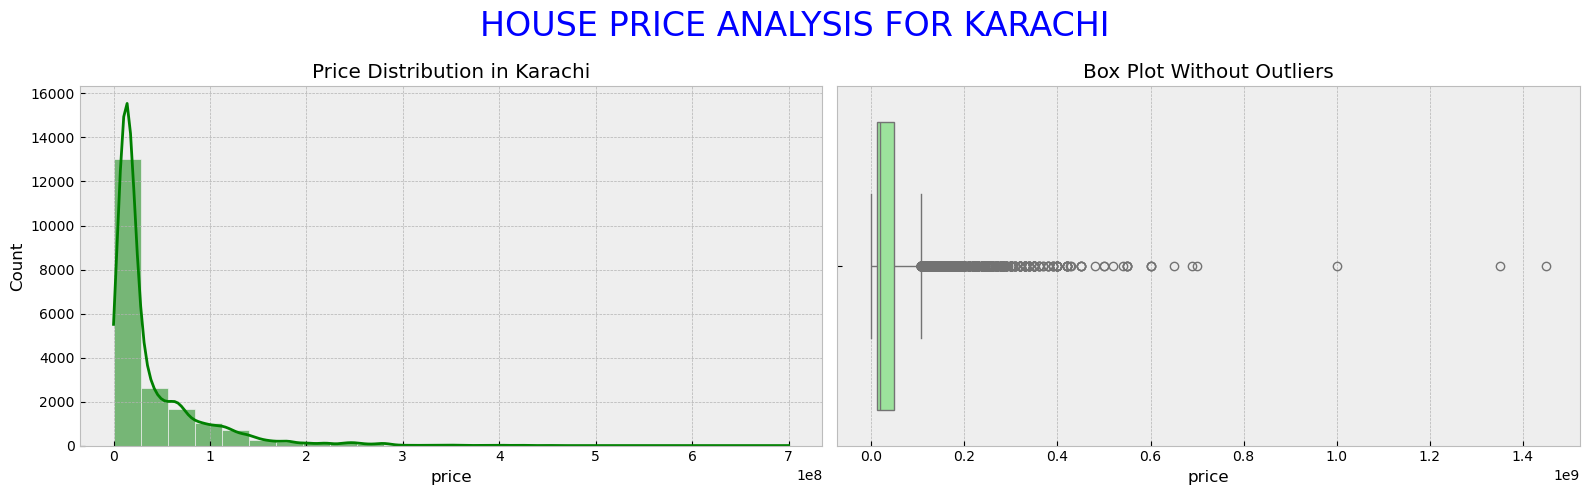

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    
sns.histplot(data=df, x='price', bins=25, ax=ax1, kde=True, color='green')
ax1.set_title(f'Price Distribution in Karachi')
    
sns.boxplot(x=df1['price'], color='lightgreen', ax=ax2)
ax2.set_title("Box Plot Without Outliers")

# Add a title to the entire figure
fig.suptitle(f'HOUSE PRICE ANALYSIS FOR KARACHI', fontsize=24, color='blue')

# Adjust layout to avoid overlap
plt.tight_layout()
    
plt.show()

In [24]:
#checking the fitness of model
import scipy.stats as stats

# Predicted values and residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# Calculate F-statistic and p-value
n = X_train.shape[0]  # Number of observations
p = X_train.shape[1]  # Number of features
k = p + 1  # Number of model parameters (including the intercept)

# Residual Sum of Squares (RSS) and Total Sum of Squares (TSS)
RSS = np.sum(residuals**2)
TSS = np.sum((y_train - np.mean(y_train))**2)

# Mean Squared Error (MSE)
MSE = RSS / (n - k)

# F-statistic: (TSS - RSS) / k / MSE
F_statistic = (TSS - RSS) / k / MSE

# Calculate p-value for F-statistic using the F-distribution
F_p_value = 1 - stats.f.cdf(F_statistic, p, n - k)

print(f"F-statistic: {F_statistic}")
print(f"F-statistic p-value: {F_p_value}")

# Calculate p-values for individual coefficients (using standard errors)
X_train_with_intercept = np.c_[np.ones((n, 1)), X_train]  # Add intercept term
beta_hat = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)

# Residuals and variance-covariance matrix
residuals = y_train - X_train_with_intercept.dot(beta_hat)
MSE = np.sum(residuals**2) / (n - k)
cov_matrix = MSE * np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept))

# Standard errors of the coefficients
standard_errors = np.sqrt(np.diag(cov_matrix))

# t-statistics and p-values for each coefficient
t_stats = beta_hat / standard_errors
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - k))

print("Coefficients:", beta_hat)
print("Standard errors:", standard_errors)
print("t-statistics:", t_stats)
print("p-values for coefficients:", p_values)

F-statistic: -821.7177493791827
F-statistic p-value: 1.0
Coefficients: [-3.14583637e+07 -6.18514255e+02 -1.23391040e+05  1.17763974e+05
  1.46039393e+04 -3.60737955e+05  3.01209668e+03]
Standard errors: [6.59937437e+05 4.67843896e+01 2.38581896e+04 9.01562359e+04
 7.32250090e+01 1.01130743e+05 2.84616858e+01]
t-statistics: [-47.66870611 -13.22052635  -5.17185263   1.30622106 199.43922843
  -3.56704543 105.82987584]
p-values for coefficients: [0.00000000e+00 0.00000000e+00 2.34601722e-07 1.91496314e-01
 0.00000000e+00 3.62091431e-04 0.00000000e+00]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


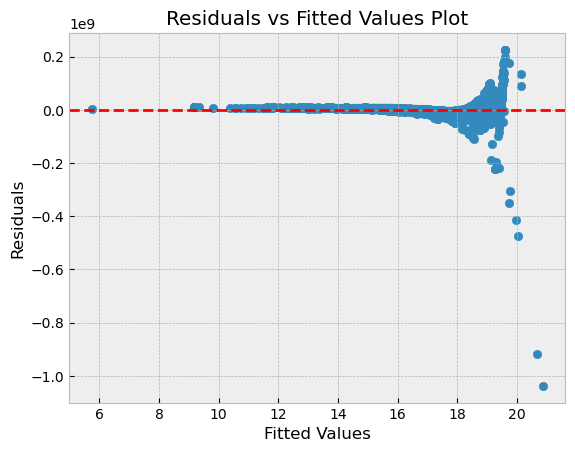

In [25]:
#Residual plot
import statsmodels.api as sm

# Add constant (intercept) to the feature matrix
X = sm.add_constant(X)


# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Calculate residuals and fitted values
fitted_values = results.fittedvalues
residuals = results.resid

# Plot Residuals vs Fitted Values
plt.scatter(np.log(fitted_values), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.show()

In [26]:
#model summary using OLS
import statsmodels.api as sm

# Add a constant (intercept) to the features matrix (this is required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)  # OLS = Ordinary Least Squares regression
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 2.086e+04
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:54:45   Log-Likelihood:            -3.6059e+05
No. Observations:               19857   AIC:                         7.212e+05
Df Residuals:                   19850   BIC:                         7.212e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.159e+07    5.6e+05    -56.380   

## END OF NOTEBOOK